## Problem przenikania (percolation problem)

Problem przenikania (percolation problem) to zagadnienie z dziedziny teorii prawdopodobieństwa i fizyki statystycznej, które bada zjawisko przepływu przez losowe medium porowate. 

W klasycznym ujęciu problem ten można przedstawić za pomocą siatki kwadratowej, gdzie każda komórka jest losowo otwarta (przepuszczalna) z prawdopodobieństwem _p_ lub zamknięta (nieprzepuszczalna) z prawdopodobieństwem _1-p_. Pytanie podstawowe brzmi: dla jakiej wartości progowej prawdopodobieństwa _p_ istnieje ścieżka otwartych komórek łącząca górną i dolną krawędź siatki?

Problem ten ma liczne zastosowania praktyczne, m.in. w:
- badaniu przepływu cieczy przez ośrodki porowate
- analizie przewodnictwa w materiałach niejednorodnych
- modelowaniu rozprzestrzeniania się pożarów lub epidemii
- symulacji przejść fazowych w układach fizycznych

Problem przenikania jest jednym z fundamentalnych problemów w teorii perkolacji i stanowi ważny przykład zjawiska krytycznego z wyraźnym przejściem fazowym.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def stworz_tablice(N: int, p: float) -> np.ndarray:
    """
    Tworzy kwadratową tablicę perkolacyjną o wymiarach NxN.
    
    Każda komórka tablicy jest losowo wypełniona wartością 1 (otwarta/przepuszczalna)
    z prawdopodobieństwem p lub wartością 0 (zamknięta/nieprzepuszczalna)
    z prawdopodobieństwem 1-p.
    
    Parametry:
    ----------
    N : int
        Wymiar tablicy (liczba wierszy i kolumn)
    p : float
        Prawdopodobieństwo, że komórka będzie otwarta (przepuszczalna)
        Wartość powinna być z zakresu [0, 1]
    
    Zwraca:
    -------
    np.ndarray
        Tablica binarna o wymiarach NxN, gdzie 1 oznacza komórkę otwartą,
        a 0 oznacza komórkę zamkniętą
    """
    tablica = np.random.random(size=(N,N))
    maska = tablica < p
    return maska.astype(int)

In [148]:
tablica_prezentacja = stworz_tablice(N=25, p=0.25)

In [61]:
from matplotlib.patches import Patch

def pokaz_tablice(tablica: np.ndarray) -> None:
    plt.figure(figsize=(8, 6))
    im = plt.imshow(tablica, cmap="berlin")
    plt.title("Siatka perkolacyjna")
    
    # Dodajemy legendę
    legend_elements = [
        Patch(facecolor=im.cmap(im.norm(1)), label='Otwarte (przepuszczalne)'),
        Patch(facecolor=im.cmap(im.norm(0)), label='Zamknięte (nieprzepuszczalne)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.colorbar(label='Stan komórki (1 = otwarta, 0 = zamknięta)')
    plt.xlabel("Współrzędna X")
    plt.ylabel("Współrzędna Y")
    plt.show()

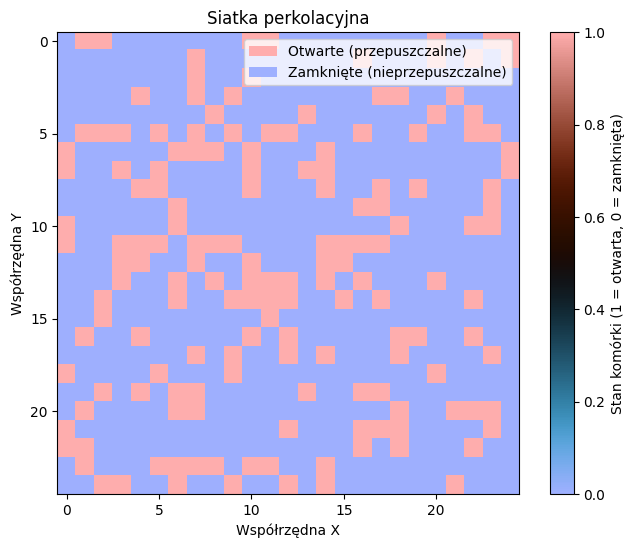

In [149]:
pokaz_tablice(tablica_prezentacja)

In [ ]:
def sprawdz_punkt(tablica: np.ndarray, punkt: tuple, sprawdzone_punkty: dict[tuple, bool]) -> bool:
    """
    Sprawdza, czy istnieje ścieżka perkolacyjna począwszy od danego punktu.
    
    Funkcja rekurencyjnie analizuje, czy z danego punktu istnieje ścieżka
    otwartych komórek prowadząca do dolnej krawędzi tablicy. Wykorzystuje
    memoizację poprzez słownik sprawdzone_punkty, aby uniknąć wielokrotnego
    sprawdzania tych samych punktów.
    
    Parametry:
    ----------
    tablica : np.ndarray
        Tablica perkolacyjna, gdzie 1 oznacza komórkę otwartą, a 0 komórkę zamkniętą
    punkt : tuple
        Współrzędne punktu (wiersz, kolumna)
    sprawdzone_punkty : dict[tuple, bool]
        Słownik przechowujący wyniki wcześniejszych sprawdzeń punktów,
        gdzie klucz to współrzędne punktu, a wartość to wynik sprawdzenia
        
    Zwraca:
    -------
    bool
        True jeśli istnieje ścieżka perkolacyjna, False w przeciwnym przypadku
    """
    if punkt not in sprawdzone_punkty.keys():

        # Sprawdzenie, czy punkt jest poza zakresem tablicy
        if (punkt[0] < 0 or punkt[0] >= tablica.shape[0] or 
            punkt[1] < 0 or punkt[1] >= tablica.shape[1]):
            sprawdzone_punkty[punkt] = False
            return False
        
        # Sprawdzenie, czy punkt jest zamknięty (nieprzepuszczalny)
        if tablica[punkt[0], punkt[1]] == 0:
            sprawdzone_punkty[punkt] = False
            return False
        
        # Oznaczenie punktu jako odwiedzonego (zmiana na 0, aby uniknąć pętli)
        tablica_kopia = tablica.copy()
        tablica_kopia[punkt[0], punkt[1]] = 0
        
        # Sprawdzenie, czy dotarliśmy do dolnej krawędzi
        if punkt[0] == tablica.shape[0] - 1:
            sprawdzone_punkty[punkt] = True
            return True
        
        # Rekurencyjne sprawdzenie sąsiadów (góra, dół, lewo, prawo)
        if (sprawdz_punkt(tablica_kopia, (punkt[0] + 1, punkt[1]), sprawdzone_punkty) or  # dół
            sprawdz_punkt(tablica_kopia, (punkt[0], punkt[1] - 1), sprawdzone_punkty) or  # lewo
            sprawdz_punkt(tablica_kopia, (punkt[0], punkt[1] + 1), sprawdzone_punkty) or  # prawo
            sprawdz_punkt(tablica_kopia, (punkt[0] - 1, punkt[1]), sprawdzone_punkty)):   # góra
            sprawdzone_punkty[punkt] = True
            return True
        
        sprawdzone_punkty[punkt] = True
        return False
    else:
        return sprawdzone_punkty[punkt]

In [175]:
punkt = (0,1)
sprawdzone_punkty = {}

sprawdz_punkt(tablica_prezentacja, punkt, sprawdzone_punkty)

False

In [197]:
def sprawdz_tablice(tablica: np.ndarray) -> bool:
    """
    Sprawdza, czy w tablicy perkolacyjnej istnieje ścieżka przepływu (perkolacji)
    od górnej krawędzi do dolnej krawędzi.
    
    Funkcja analizuje każdą komórkę w górnym wierszu tablicy jako potencjalny
    początek ścieżki perkolacyjnej. Dla każdej otwartej komórki w górnym wierszu
    sprawdza rekurencyjnie, czy istnieje ścieżka otwartych komórek prowadząca 
    do dolnego brzegu.
    
    Parametry:
    ----------
    tablica : np.ndarray
        Tablica perkolacyjna, gdzie 1 oznacza komórkę otwartą (przepuszczalną),
        a 0 oznacza komórkę zamkniętą (nieprzepuszczalną)
        
    Zwraca:
    -------
    bool
        True jeśli istnieje ścieżka perkolacyjna od górnej do dolnej krawędzi,
        False w przeciwnym przypadku
    """
    # Tworzymy kopię tablicy, aby nie modyfikować oryginalnej
    tablica_kopia = tablica.copy()
    
    # Sprawdzamy każdą komórkę w górnym wierszu
    for kolumna in range(tablica.shape[1]):
        # Pomijamy zamknięte komórki (nieprzepuszczalne)
        if tablica_kopia[0, kolumna] == 0:
            continue
            
        # Dla otwartych komórek sprawdzamy, czy istnieje ścieżka
        sprawdzone_punkty = {}
        if sprawdz_punkt(tablica_kopia, (0, kolumna), sprawdzone_punkty):
            return True
            
    # Jeśli nie znaleziono ścieżki perkolacyjnej
    return False

In [198]:
sprawdz_tablice(tablica_prezentacja)

False

In [ ]:
def prawdopodobienstwo_przenikniecia(ilosc_prob: int, N: int, p: float) -> float:
    """
    Oblicza eksperymentalne prawdopodobieństwo perkolacji dla danego rozmiaru siatki i prawdopodobieństwa komórki otwartej.
    
    Funkcja wykonuje określoną liczbę symulacji perkolacji dla siatki o wymiarach NxN, 
    gdzie każda komórka jest otwarta z prawdopodobieństwem p. Dla każdej próby generuje
    nową losową siatkę i sprawdza, czy istnieje ścieżka perkolacyjna od górnej do dolnej krawędzi.
    
    Parametry:
    ----------
    ilosc_prob : int
        Liczba prób (symulacji) do wykonania
    N : int
        Wymiar siatki (liczba wierszy i kolumn)
    p : float
        Prawdopodobieństwo, że komórka będzie otwarta (przepuszczalna)
        Wartość powinna być z zakresu [0, 1]
    
    Zwraca:
    -------
    float
        Oszacowane prawdopodobieństwo perkolacji (stosunek liczby prób,
        w których wystąpiła perkolacja, do całkowitej liczby prób)
    
    Przykład:
    --------
    >>> prawdopodobienstwo_przenikniecia(100, 10, 0.6)
    0.78  # 78% prób zakończyło się perkolacją
    """
    udane_proby = 0
    for proba in range(ilosc_prob):
        tablica = stworz_tablice(N, p)
        if sprawdz_tablice(tablica):
            udane_proby += 1
    return udane_proby / ilosc_prob

In [251]:
prawdopodobienstwo_przenikniecia(ilosc_prob=100, N=100, p=0.6)

1.0

In [223]:
def wyniki_dla_wszystkich_p(ilosc_prob: int, N: int, krok: float) -> tuple[np.ndarray, list]:
    """
    Przeprowadza symulacje perkolacji dla różnych wartości prawdopodobieństwa p 
    i zwraca wyniki tych symulacji.
    
    Funkcja generuje sekwencję wartości prawdopodobieństwa p od 0 do 1 z zadanym krokiem,
    a następnie dla każdej wartości p przeprowadza zadaną liczbę prób perkolacji.
    Dla każdej wartości p oblicza prawdopodobieństwo wystąpienia perkolacji jako 
    stosunek udanych prób do całkowitej liczby prób.
    
    Parametry:
    ----------
    ilosc_prob : int
        Liczba prób (symulacji) dla każdej wartości p
    N : int
        Wymiar siatki perkolacyjnej (liczba wierszy i kolumn)
    krok : float
        Przyrost wartości prawdopodobieństwa p między kolejnymi symulacjami
        
    Zwraca:
    -------
    tuple[np.ndarray, list]
        Krotka zawierająca:
        - np.ndarray: wektor wartości prawdopodobieństwa p
        - list: listę odpowiadających prawdopodobieństw wystąpienia perkolacji
        
    Przykład:
    --------
    >>> P, wyniki = wyniki_dla_wszystkich_p(ilosc_prob=100, N=10, krok=0.1)
    >>> print(P)
    [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
    >>> print(wyniki)
    [0.0, 0.03, 0.12, 0.35, 0.71, 0.88, 0.99, 1.0, 1.0, 1.0, 1.0]
    """
    P = np.arange(0, 1+krok, krok, dtype=float)
    wyniki = []
    for p in P:
        wyniki.append(
            prawdopodobienstwo_przenikniecia(ilosc_prob, N, p)
        )
    return (P, wyniki)

In [227]:
P, wyniki = wyniki_dla_wszystkich_p(ilosc_prob=100, N=25, krok=0.01)

In [242]:
def pokaz_wyniki_dla_wszystkich_p(P: np.ndarray, wyniki: list) -> None:
    """
    Wyświetla wykres prawdopodobieństwa perkolacji w zależności od
    prawdopodobieństwa otwarcia komórki.
    
    Funkcja tworzy wykres przedstawiający jak prawdopodobieństwo wystąpienia
    perkolacji zmienia się w zależności od prawdopodobieństwa p, że pojedyncza
    komórka jest otwarta (przepuszczalna).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(P, wyniki, 'o-', color='blue', linewidth=2, markersize=8)
    
    
    plt.xlabel('Prawdopodobieństwo otwarcia komórki (p)', fontsize=12)
    plt.ylabel('Prawdopodobieństwo perkolacji', fontsize=12)
    plt.title('Prawdopodobieństwo perkolacji w zależności od prawdopodobieństwa otwarcia komórki', fontsize=14)
    
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    
    plt.show()

/tmp/ipykernel_17232/487755382.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


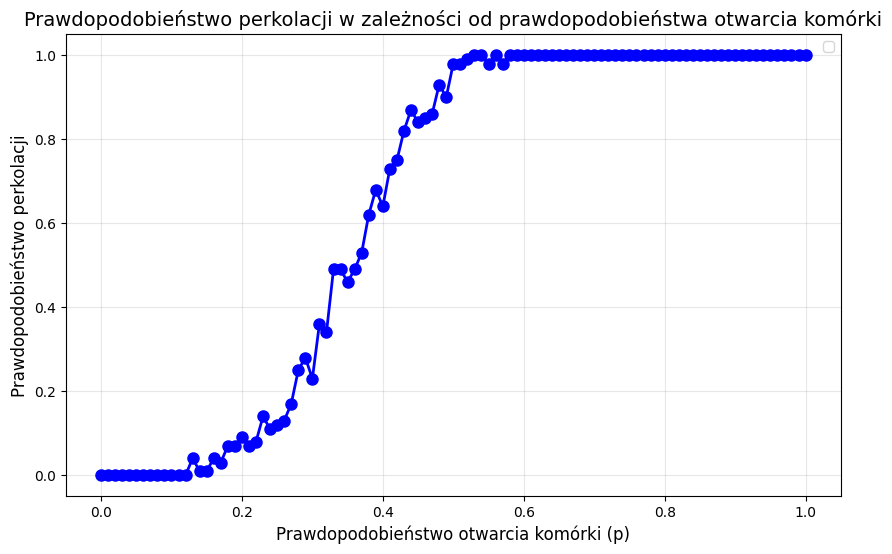

In [243]:
pokaz_wyniki_dla_wszystkich_p(P, wyniki)

In [240]:
def pokaz_wyniki_dla_wszystkich_p_dla_kilku_N(min_N: int, max_N: int, krok: int) -> None:
    """
    Wyświetla wykres prawdopodobieństwa perkolacji w zależności od
    prawdopodobieństwa otwarcia komórki dla różnych rozmiarów siatki N.
    
    Funkcja tworzy wykres przedstawiający jak prawdopodobieństwo wystąpienia
    perkolacji zmienia się w zależności od prawdopodobieństwa p, dla różnych
    rozmiarów siatki od min_N do max_N z zadanym krokiem.
    
    Parametry:
    ----------
    min_N : int
        Minimalny rozmiar siatki do symulacji
    max_N : int
        Maksymalny rozmiar siatki do symulacji
    krok : int
        Przyrost rozmiaru siatki między kolejnymi symulacjami
    """
    plt.figure(figsize=(12, 7))
    
    # Wartości prawdopodobieństwa p dla których będziemy obliczać perkolację
    P = np.arange(0, 1.01, 0.05, dtype=float)
    
    # Kolory dla różnych rozmiarów siatki
    colors = plt.colormaps["viridis"](np.linspace(0, 1, (max_N - min_N) // krok + 1))
    
    # Dla każdego rozmiaru siatki
    i = 0
    for N in range(min_N, max_N + 1, krok):
        wyniki = []
        # Dla każdej wartości p
        for p in P:
            wyniki.append(
                prawdopodobienstwo_przenikniecia(100, N, p)
            )
        
        # Rysujemy wykres dla tego rozmiaru siatki
        plt.plot(P, wyniki, 'o-', color=colors[i], linewidth=2, markersize=5, 
                label=f'N = {N}')
        i += 1
    
    
    plt.xlabel('Prawdopodobieństwo otwarcia komórki (p)', fontsize=12)
    plt.ylabel('Prawdopodobieństwo perkolacji', fontsize=12)
    plt.title('Prawdopodobieństwo perkolacji w zależności od rozmiaru siatki i prawdopodobieństwa otwarcia', fontsize=14)
    
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    
    plt.show()


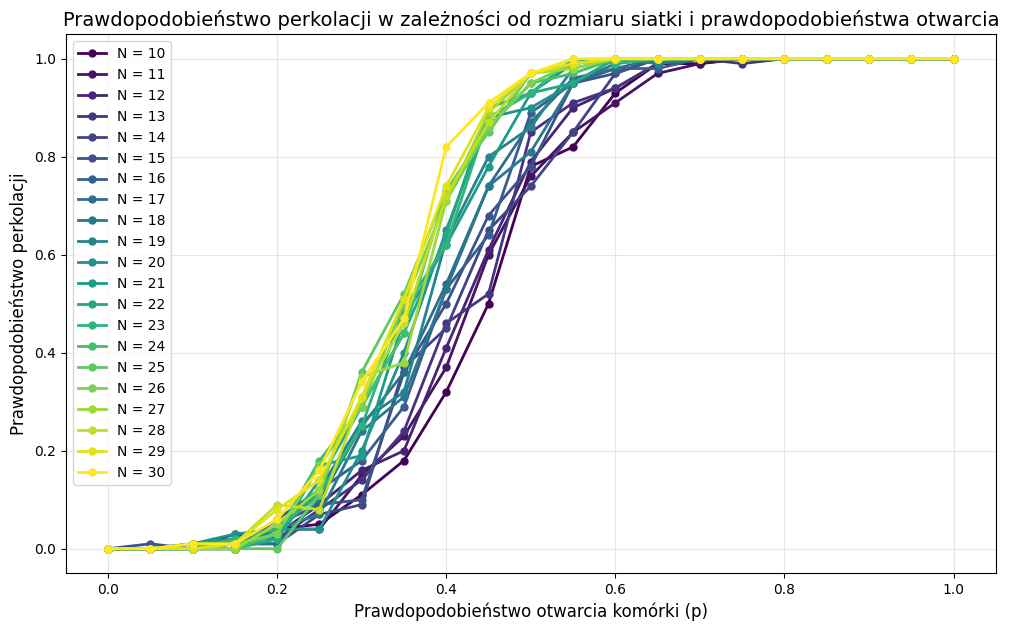

In [241]:
pokaz_wyniki_dla_wszystkich_p_dla_kilku_N(min_N=10, max_N=30, krok=1)

In [247]:
def punkt_krytyczny(P: np.ndarray, wyniki: list) -> float:
    """
    Wyznacza przybliżoną wartość punktu krytycznego dla perkolacji.
    
    Funkcja identyfikuje pierwszy (idąc od wartości 1.0 w dół) próg
    prawdopodobieństwa p, dla którego perkolacja nie zachodzi z pewnością
    (tzn. prawdopodobieństwo perkolacji jest mniejsze niż 1).
    
    Parametry:
    ----------
    P : np.ndarray
        Wektor wartości prawdopodobieństwa p (prawdopodobieństwo otwarcia komórki)
    wyniki : list
        Lista odpowiadających prawdopodobieństw wystąpienia perkolacji
    
    Zwraca:
    -------
    float
        Przybliżona wartość punktu krytycznego (pierwsza wartość p < 1.0,
        dla której prawdopodobieństwo perkolacji jest mniejsze niż 1)
        
    Przykład:
    ---------
    >>> P = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    >>> wyniki = [0.1, 0.3, 0.7, 0.9, 1.0, 1.0]
    >>> punkt_krytyczny(P, wyniki)
    0.9
    """
    for idx, wynik in enumerate(wyniki[::-1]):
        if wynik != 1:
            return P[len(P) - idx]
    return 0

In [248]:
punkt_krytyczny(P, wyniki)

np.float64(0.58)

## Dyskusja wyników i skalowanie problemu z rozmiarem tablicy N

### Punkt krytyczny
Symulacje pokazały występowanie przejścia fazowego przy krytycznej wartości p ≈ 0.59 dla N=25.
Jest to zbieżne z teoretyczną wartością 0.5927... dla nieskończonej siatki kwadratowej.

### Wpływ rozmiaru tablicy N
1. **Ostrzejsze przejście fazowe** - Wraz ze wzrostem N przejście staje się bardziej strome.
2. **Stabilizacja punktu krytycznego** - Dla większych N, punkt krytyczny zbliża się do teoretycznej wartości 0.5927...
3. **Zmniejszenie fluktuacji** - Większe siatki wykazują mniejsze fluktuacje w okolicy punktu krytycznego.

### Złożoność obliczeniowa
- **Złożoność czasowa**: O(N²) dla generowania siatki + O(N⁴) dla algorytmu przeszukiwania
- **Złożoność pamięciowa**: O(N²)
Osiągnięcie powyższych złożoności obliczeniowej była możliwa dzięki zastosowaniu programowania dynamicznego. Bez tego algorytm nawet dla prostego przypadku byłby liczony w minutach zamiast sekund.

### Wnioski
1. Wyniki potwierdzają istnienie ostrego przejścia fazowego.
2. Dla dokładnych wyników potrzebne są duże siatki (N > 20) i wiele prób.
3. Wymagane było wykorzystanie programowania dynamicznego w celu otrzymania wyników w krótkim czasie nawet dla dużych siatek (N > 100).
